<a href="https://colab.research.google.com/github/MehakArora/MLP_FromScratch/blob/master/MLPfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from tqdm import trange

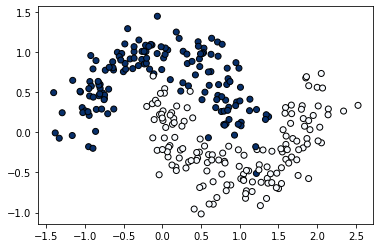

Features: 2
No. of samples:  300


In [2]:
#Creating Dataset 
X, y = make_moons(n_samples = 300, noise = 0.2, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Blues_r', edgecolors='k')
plt.show()
print("Features:" , X.shape[1])
print("No. of samples: ", X.shape[0])

In [3]:
#Pre-processing data - train, test split and normalisation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("Training samples: ", X_train.shape[0])
print("Testing samples: ", X_test.shape[0])

train_mean = np.mean(X_train, axis = 0)
train_std = np.std(X_train, axis = 0)

X_train = (X_train - train_mean)/train_std
X_test = (X_test - train_mean)/train_std


Training samples:  240
Testing samples:  60


In [8]:
#Building th network 

network = []
l1 = Layer(X_train.shape[1], 10, 0.3)
network.append(l1)
l2 = Layer(10,10, 0.3)
network.append(l2)
l3 = Layer(10,2,0.3)
network.append(l3)


In [4]:
def forward_pass(network, input):
  
  outa = []
  activations = []
  
  for n in network:
    a, z = n.forward_pass(input)
    outa.append(a)
    activations.append(z)
    input = z
  
  return outa, activations 

def train_layer(network, X, y):
  
  assert len(X) == len(y)
  outa, activations = forward_pass(network, X)
  
  softmax = SoftmaxPred(activations[-1])
  loss = CrossEntropyLoss(softmax,y)

  grad_loss = LossGrad(softmax,y)
  
  depth = len(network)
  grad = grad_loss
  for l in range(depth)[::-1]:
    grad_inp = network[l].backward(outa[-1 - (depth - l)], activations[-1 - (depth-l)], grad)
    grad = grad_inp
  
  return np.mean(loss)
  


In [3]:
def generateMiniBatches(X,y,batchsize):
  assert batchsize > 0 
  for start_idx in trange(0, len(y) - batchsize + 1, batchsize):
    excerpt = slice(start_idx, start_idx + batchsize)
  yield X[excerpt], y[excerpt]



In [5]:
def sigmoid(z):
  return 1/(1+np.e**(-1*z))

def sigmoid_grad(z):
  return sigmoid(z) * (1-sigmoid(z))

In [6]:
class Layer:
  def __init__(self, prev_nodes, nodes, learning_rate):
    self.nodes = nodes
    self.w = np.random.normal(loc = 0.0, scale = (2/(prev_nodes*nodes)), size = (prev_nodes, nodes))
    self.bias = np.zeros(nodes)
    self.learning_rate = learning_rate
    self.output = np.zeros(nodes)
  
  def ForwardPass(self, layer_input):
    outputa = layer_input @ self.w + self.bias
    outputz = sigmoid(output)
    return outputa, outputz

  def BackwardPass(self, layer_input, sig_input, grad_output):
    g = sigmoid_grad(sig_input) * grad_output
    grad_bias = np.mean(g, axis = 0)
    grad_weight = layer_input.T @ g
    grad_input = g.mean(axis = 0) @ self.w.T
    self.SGD(grad_weight, grad_bias)
    return grad_input
  
  def SGD(self, grad_weight, grad_bias):
    self.w = self.w - self.learning_rate*grad_weight
    self.bias = self.bias - self.learning_rate*grad_bias
    return 0

    





In [1]:
def SoftmaxPred(output):
  softmax = (np.e**output)/np.sum(np.e**output, axis = 1).reshape(output.shape[0],1)
  return softmax

def Predict(softmax):
  prediction = np.argmax(softmax, axis = 1).reshape(output.shape[0],1)
  return prediction

def CrossEntropyLoss(softmax, y):
  #One-hot Encoding the answers
  y_one_hot = np.zeros_like(softmax)
  y_one_hot[np.arange(softmax.shape[0]), y] = 1

  #Cross Entropy Loss
  l = (-1/softmax.shape[0])*np.sum(np.sum((y_one_hot*np.log(softmax)),axis = 1))
  return l

def LossGrad(softmax, y):
  #One-hot Encoding the answers
  y_one_hot = np.zeros_like(softmax)
  y_one_hot[np.arange(softmax.shape[0]), y] = 1

  grad_loss = (softmax - y_one_hot)/softmax.shape[0]
  return grad_loss   

In [ ]:
from Ipython.display import clear_output

train_log = []
val_log = []

num_epochs = 25
batchsize = 5

for epoch in range(num_epochs):

  for X_batch, y_batch in generateMiniBatches(X_train, y_train, batchsize):
    train_layer(network, X_batch, y_batch)
  
  train_log.append(np.mean(predict(network,X_train)==y_train))
  val_log.append(np.mean(predict(network,X_val)==y_val))
